In [52]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

MAX_UNIQUES = 15

In [53]:
# Dataset: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small
dataset_path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-small")
dataset_path = Path(dataset_path)
print("Path to dataset files:", dataset_path)

# Ścieżka do danych
styles_file = os.path.join(dataset_path, "styles.csv")

# Wczytanie pliku CSV
df = pd.read_csv(styles_file, on_bad_lines="skip", low_memory=False)

# Wyświetlenie podstawowych informacji
df.info()
df.head()


Path to dataset files: C:\Users\tthaddey\.cache\kagglehub\datasets\paramaggarwal\fashion-product-images-small\versions\1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [54]:
# Info o danych
# Sprawdzenie brakujących wartości
missing_data = df.isnull().sum()
print("Brakujące wartości w kolumnach:")
print(missing_data[missing_data > 0])

# Liczba unikalnych wartości w każdej kolumnie
unique_values = df.nunique()
print("\nLiczba unikalnych wartości w każdej kolumnie:")
print(unique_values)

Brakujące wartości w kolumnach:
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

Liczba unikalnych wartości w każdej kolumnie:
id                    44424
gender                    5
masterCategory            7
subCategory              45
articleType             143
baseColour               46
season                    4
year                     13
usage                     8
productDisplayName    31121
dtype: int64


In [55]:
# Usuwanie rekordów z brakującymi wartościami
df_cleaned = df.dropna()

# Lista kolumn, które nie będą zamieniane na 'other'
columns_to_exclude = ['id', 'productDisplayName']

# Zmiana kolumn z więcej niż 15 unikalnymi wartościami (z wyłączeniem wybranych kolumn)
for col in df_cleaned.columns:
    if col not in columns_to_exclude and df_cleaned[col].nunique() > MAX_UNIQUES:
        top_values = df_cleaned[col].value_counts().nlargest(MAX_UNIQUES).index
        df_cleaned[col] = df_cleaned[col].where(df_cleaned[col].isin(top_values), other="other")

# Zamiana wszystkich wartości stringowych na małe litery
df_cleaned = df_cleaned.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Zmiana typu kolumny "year" z liczbowego na kategoryczny (jeśli istnieje)
if "year" in df_cleaned.columns:
    df_cleaned["year"] = df_cleaned["year"].astype("object")

# Informacje po czyszczeniu
print("\nPo czyszczeniu danych:")
df_cleaned.info()

# Liczba unikalnych wartości w każdej kolumnie
unique_values = df.nunique()
print("\nLiczba unikalnych wartości w każdej kolumnie:")
print(unique_values)

print("\nPierwsze wiersze danych po czyszczeniu:")
df_cleaned.head(20)



Po czyszczeniu danych:
<class 'pandas.core.frame.DataFrame'>
Index: 44077 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  44077 non-null  int64 
 1   gender              44077 non-null  object
 2   masterCategory      44077 non-null  object
 3   subCategory         44077 non-null  object
 4   articleType         44077 non-null  object
 5   baseColour          44077 non-null  object
 6   season              44077 non-null  object
 7   year                44077 non-null  object
 8   usage               44077 non-null  object
 9   productDisplayName  44077 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB

Liczba unikalnych wartości w każdej kolumnie:
id                    44424
gender                    5
masterCategory            7
subCategory              45
articleType             143
baseColour               46
season                    4
yea

C:\Users\tthaddey\AppData\Local\Temp\ipykernel_21360\1435816147.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].where(df_cleaned[col].isin(top_values), other="other")
C:\Users\tthaddey\AppData\Local\Temp\ipykernel_21360\1435816147.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].where(df_cleaned[col].isin(top_values), other="other")
C:\Users\tthaddey\AppData\Local\Temp\ipykernel_21360\1435816147.py:11: SettingWithCopyWarning: 
A va

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,men,apparel,topwear,shirts,navy blue,fall,2011.0,casual,turtle check men navy blue shirt
1,39386,men,apparel,bottomwear,other,blue,summer,2012.0,casual,peter england men party blue jeans
2,59263,women,accessories,watches,watches,silver,winter,2016.0,casual,titan women silver watch
3,21379,men,apparel,bottomwear,other,black,fall,2011.0,casual,manchester united men solid black track pants
4,53759,men,apparel,topwear,tshirts,grey,summer,2012.0,casual,puma men grey t-shirt
5,1855,men,apparel,topwear,tshirts,grey,summer,2011.0,casual,inkfruit mens chain reaction t-shirt
6,30805,men,apparel,topwear,shirts,green,summer,2012.0,ethnic,fabindia men striped green shirt
7,26960,women,apparel,topwear,shirts,purple,summer,2012.0,casual,jealous 21 women purple shirt
8,29114,men,accessories,socks,other,navy blue,summer,2012.0,casual,puma men pack of 3 socks
9,30039,men,accessories,watches,watches,black,winter,2016.0,casual,skagen men black watch


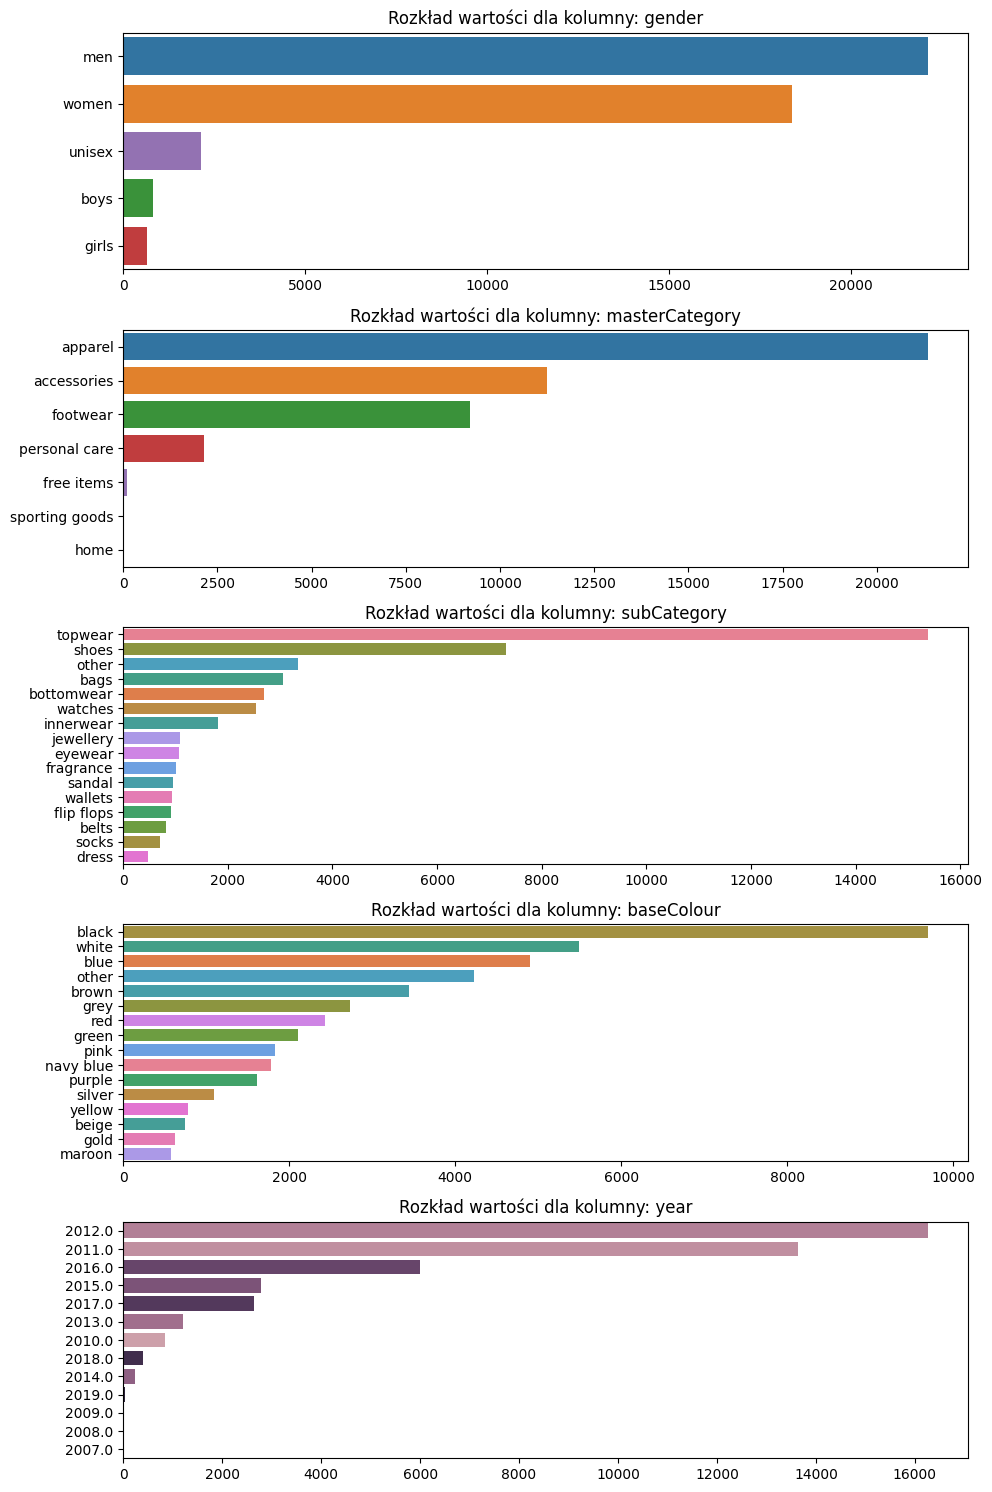

In [56]:
# Rozklad danych
# Kolumny do analizy (pomijając 'id' oraz kolumny z opisami)
columns_to_analyze = [col for col in df.columns if col not in ['id', 'productDisplayName', 'articleType', 'season', 'usage']]

# Tworzenie wykresów
plt.figure(figsize=(10, len(columns_to_analyze) * 3))  # Zmniejszony rozmiar obrazu

for idx, column in enumerate(columns_to_analyze, 1):
    plt.subplot(len(columns_to_analyze), 1, idx)
    sns.countplot(y=column, data=df_cleaned, order=df_cleaned[column].value_counts().index, hue=column, legend=False)
    plt.title(f"Rozkład wartości dla kolumny: {column}", fontsize=12)
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout(pad=1.0)  # Mniejsza odległość między wykresami

# Wyświetlenie wszystkich wykresów na jednym obrazie
plt.show()



In [57]:
from sklearn.model_selection import train_test_split

# Ścieżka do katalogu zapisu
output_dir = Path("../data")
output_dir.mkdir(parents=True, exist_ok=True)  # Tworzy katalog, jeśli nie istnieje

# Podział na treningowy (80%) i testowy (20%)
df_train, df_test = train_test_split(df_cleaned, test_size=0.2, random_state=42, stratify=df_cleaned['gender'])

# Ścieżki do plików
train_file = output_dir / "styles_train.csv"
test_file = output_dir / "styles_test.csv"

# Zapisywanie do plików CSV
df_train.to_csv(train_file, index=False)
df_test.to_csv(test_file, index=False)

print(f"Zapisano zbiór treningowy do: {train_file}")
print(f"Zapisano zbiór testowy do: {test_file}")

Zapisano zbiór treningowy do: ..\data\styles_train.csv
Zapisano zbiór testowy do: ..\data\styles_test.csv


In [58]:
# Tworzenie pliku konfiguracyjnego
import json

config_path = Path("../config.json")
config_data = {
    "dataset_path": str(dataset_path.resolve()),
    "train_file": str(train_file.resolve()),
    "test_file": str(test_file.resolve()),
    "max_uniques": MAX_UNIQUES
}

with open(config_path, "w") as config_file:
    json.dump(config_data, config_file, indent=4)

print(f"Zapisano zbiór treningowy do: {train_file}")
print(f"Zapisano zbiór testowy do: {test_file}")
print(f"Ścieżki zapisane w pliku konfiguracyjnym: {config_path}")


Zapisano zbiór treningowy do: ..\data\styles_train.csv
Zapisano zbiór testowy do: ..\data\styles_test.csv
Ścieżki zapisane w pliku konfiguracyjnym: ..\config.json
